In [1]:
import os
import pandas as pd

# Define the path to the STA file
folder_path = "Nepal/Nepal/Nepal 2022/NP_2022_DHS_11092023_2251_202866/NPHR82DT"
file_name = "NPHR82FL.DTA"
sta_file_path = os.path.join(folder_path, file_name)

# Check if the file exists
if os.path.exists(sta_file_path):
    # Read the STA file into a pandas DataFrame
    df = pd.read_stata(sta_file_path)
    
    # Display information about the DataFrame
    print("DataFrame Info:")
    print(df.info())
    
    # Display the DataFrame
    print("\nContents of the STA file:")
    print(df)
else:
    print(f"The file {file_name} does not exist in the specified folder.")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13786 entries, 0 to 13785
Columns: 3027 entries, hhid to hai13z_5
dtypes: category(2659), float64(319), int16(13), int32(4), int8(15), object(17)
memory usage: 73.2+ MB
None

Contents of the STA file:
               hhid hv000  hv001  hv002 hv003  hv004   hv005  hv006  hv007  \
0             1   1   NP8      1      1     1      1  934601   magh   2078   
1             1   6   NP8      1      6     1      1  934601   magh   2078   
2             1   8   NP8      1      8     1      1  934601   magh   2078   
3             1   9   NP8      1      9     2      1  934601   magh   2078   
4             1  11   NP8      1     11     4      1  934601   magh   2078   
...             ...   ...    ...    ...   ...    ...     ...    ...    ...   
13781       476 132   NP8    476    132     1    476  481982  poush   2078   
13782       476 137   NP8    476    137     1    476  481982  poush   2078   
13783       476 142   NP8    47

In [4]:
#Create a new dataframe with the classes and the room proportion
new_df = df[["shecoreg", "hv009", "hv216"]].copy()
new_df["RoomProp"] = new_df["hv009"]/new_df["hv216"]
new_df

,shecoreg,hv009,hv216,RoomProp
0,mountain,7,2,3.500000
1,mountain,2,1,2.000000
2,mountain,7,2,3.500000
3,mountain,6,2,3.000000
4,mountain,6,3,2.000000
...,...,...,...,...
13781,terai,5,2,2.500000
13782,terai,3,3,1.000000
13783,terai,4,3,1.333333
13784,terai,4,2,2.000000


In [5]:
new_df["shecoreg"].value_counts()

shecoreg
hill        6693
terai       5828
mountain    1265
Name: count, dtype: int64

In [7]:
#Because the mountain class is very minimal, we will remove all data pertaining to this class
new_df.drop(new_df[new_df["shecoreg"] == "mountain"].index, inplace=True)
new_df["shecoreg"].value_counts()

shecoreg
hill        6693
terai       5828
mountain       0
Name: count, dtype: int64

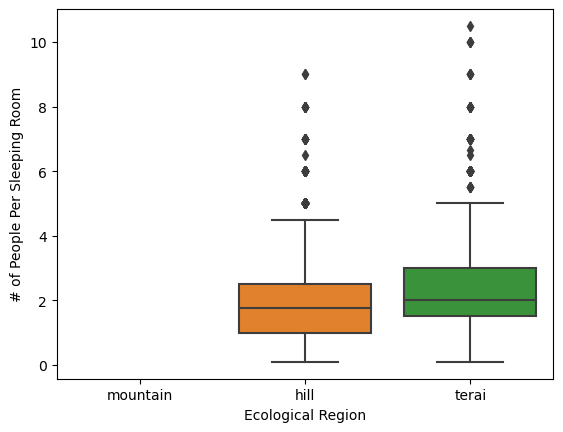

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
#Base visualization of the room proportion
# Create a seaborn boxplot
sns.boxplot(x='shecoreg', y='RoomProp', data=new_df)

# Set labels and title
plt.xlabel('Ecological Region')
plt.ylabel('# of People Per Sleeping Room')

# Show the plot
plt.show()

In [10]:
#Remove outliers
from scipy import stats



# Calculate the z-scores
z_scores = stats.zscore(new_df['RoomProp'])

# Define a threshold (e.g., 3) beyond which values are considered outliers
threshold = 3

# Identify and remove outliers
outliers = new_df[(z_scores > threshold) | (z_scores < -threshold)]
df_no_outliers = new_df[(z_scores <= threshold) & (z_scores >= -threshold)]

print("Original DataFrame:")
print(new_df)
print("\nDataFrame without outliers:")
print(df_no_outliers)
print("\nOutliers:")
print(outliers)

Original DataFrame:
      shecoreg  hv009  hv216  RoomProp
172       hill      2      2  1.000000
173       hill      6      2  3.000000
174       hill      4      1  4.000000
175       hill      5      2  2.500000
176       hill      5      1  5.000000
...        ...    ...    ...       ...
13781    terai      5      2  2.500000
13782    terai      3      3  1.000000
13783    terai      4      3  1.333333
13784    terai      4      2  2.000000
13785    terai      9      2  4.500000

[12521 rows x 4 columns]

DataFrame without outliers:
      shecoreg  hv009  hv216  RoomProp
172       hill      2      2  1.000000
173       hill      6      2  3.000000
174       hill      4      1  4.000000
175       hill      5      2  2.500000
176       hill      5      1  5.000000
...        ...    ...    ...       ...
13781    terai      5      2  2.500000
13782    terai      3      3  1.000000
13783    terai      4      3  1.333333
13784    terai      4      2  2.000000
13785    terai      9      2

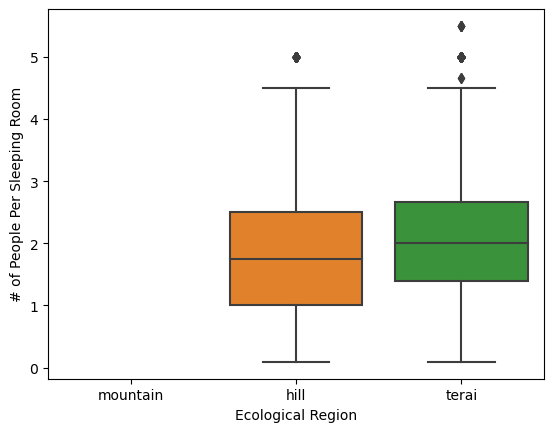

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
#Base visualization of the room proportion
# Create a seaborn boxplot
sns.boxplot(x='shecoreg', y='RoomProp', data=df_no_outliers)

# Set labels and title
plt.xlabel('Ecological Region')
plt.ylabel('# of People Per Sleeping Room')

# Show the plot
plt.show()

In [15]:
new_df["RoomProp"][new_df["shecoreg"] == "hill"]

172      1.0
173      3.0
174      4.0
175      2.5
176      5.0
        ... 
12962    3.0
12963    1.5
12964    3.0
12965    2.5
12966    3.0
Name: RoomProp, Length: 6693, dtype: float64

In [21]:
from scipy.stats import ttest_ind


group_1 = df_no_outliers["RoomProp"][df_no_outliers["shecoreg"] == "hill"]
group_2 = df_no_outliers["RoomProp"][df_no_outliers["shecoreg"] == "terai"]

t_statistic, p_value = ttest_ind(group_1, group_2)

print(ttest_ind(group_1, group_2))

if p_value < 0.05:
    print("There is a significant difference between the two classes.")
else:
    print("There is no significant difference between the two classes.")

TtestResult(statistic=-12.077722639968602, pvalue=2.1394640900280693e-33, df=12304.0)
There is a significant difference between the two classes.


In [22]:
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(group_1, group_2)

print(mannwhitneyu(group_1, group_2))

if p_value < 0.05:
    print("There is a significant difference between the two classes.")
else:
    print("There is no significant difference between the two classes.")

MannwhitneyuResult(statistic=16342883.5, pvalue=5.038624513760395e-37)
There is a significant difference between the two classes.


In [26]:
import numpy as np
np.var(group_1)

0.9946980876539233

In [27]:
np.var(group_2)

1.096084240862349

Hill


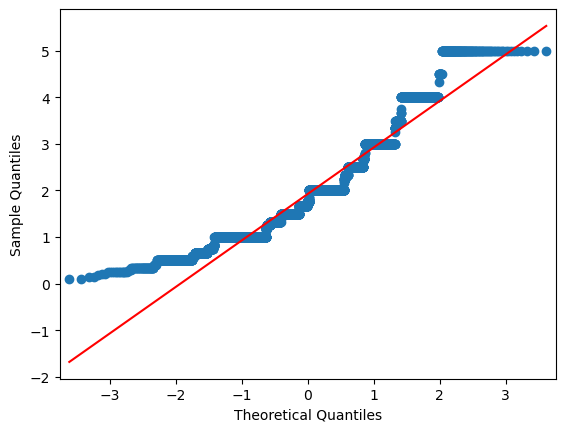

In [28]:
import statsmodels.api as sm



Terai


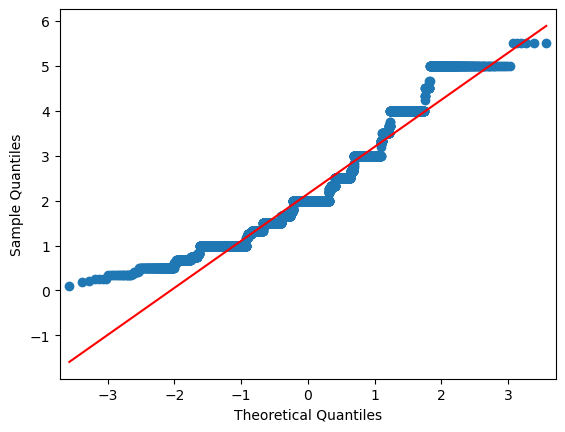

In [29]:
print("Terai")
sm.qqplot(np.array(group_2), line='s')
plt.show()